# 1. imports 


In [2]:
import os 
from datetime import datetime

import random
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
import time
import shutil




## 1.1directories




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1.2.Installing required libraries

In [ ]:
#  !pip install -r /content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main/requirements.txt

In [3]:
start_time = time.time()
try:
  import faiss
except:
  !pip install faiss-gpu
!pip install faiss-cpu 

try:
   import torchscan
except:
  !pip install torchscan

try:
    import timm
except:
  !pip install timm
try:
   import  transformers
except:
  !pip install transformers

print('time is {} '.format(time.time() -start_time  ))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 84.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.2 MB/s eta 0:00:00
time is 30.62278771400

# 2.dataset

Synthetic images have been created in this notebook: 
*   ./synthetic/Synthetic_images.ipynb

resluts of synthetic images have been saved in :        
* ./synthetic/generated2

<br>
Since uploading the generated pictures was not a good idea due to their size, you can see the imgaes in the below link:<br>
 
https://drive.google.com/drive/folders/1Htw6fDVgAU2aikGccFFfJ7xCfbQdmxkt?usp=sharing
 

# 2.1.  manage dataset files

In [ ]:

if  os.path.exists('/content/pitts30k'):
  shutil.rmtree('/content/pitts30k')
if not os.path.exists('/content/pitts30k'):
  os.makedirs('/content/pitts30k')
  os.makedirs('/content/pitts30k/images')
  os.makedirs('/content/pitts30k/images/train')
  os.makedirs('/content/pitts30k/images/train/queries')
  
  

%cp -r /content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/test /content/pitts30k/images/test
print('test set has been copied')
%cp -r /content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/val /content/pitts30k/images/val
print('val set has been copied')
%cp -r /content/drive/MyDrive/MLDL/datasets_vg/pitts30k/images/train/database /content/pitts30k/images/train/database


%cp -r /content/drive/MyDrive/MLDL/synthetic/generated3/*.jpg /content/pitts30k/images/train/queries


## 2.1.visualize dataset

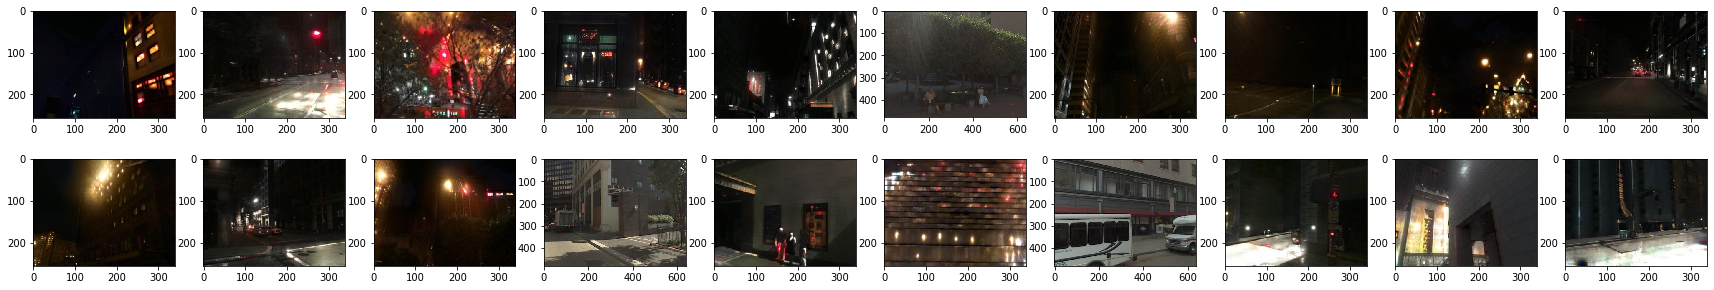

In [ ]:
input_folder = '/content/pitts30k/images/train/queries'
image_names_list = os.listdir(input_folder)
fig, axs = plt.subplots(2,10,figsize=(30,5))
for c in range(1,21):
  path=   os.path.join('/content/pitts30k/images/train/queries',image_names_list[c])
  img = cv2.imread( path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.subplot(2,10, c)        
  plt.imshow(img, cmap="gray",interpolation='none')




### 2.1.1 tokyo_night

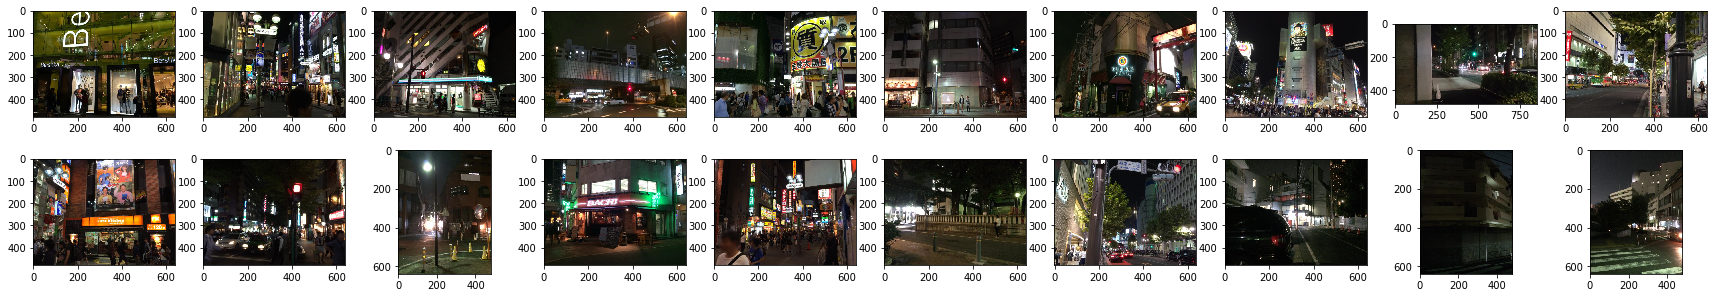

In [ ]:
input_folder = '/content/drive/MyDrive/MLDL/datasets_vg/tokyo_night/test/queries'
image_names_list = os.listdir(input_folder)
fig, axs = plt.subplots(2,10,figsize=(30,5))
for c in range(1,21):
  path=   os.path.join('/content/drive/MyDrive/MLDL/datasets_vg/tokyo_night/test/queries',image_names_list[c])
  img = cv2.imread( path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.subplot(2,10, c)        
  plt.imshow(img, cmap="gray",interpolation='none')



# 3.1. resume trainig from previous model (with NetVLAD)
contine training by new datset

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 train.py --dataset_name=pitts30k --datasets_folder='/content' \
--backbone=resnet18conv4\
--resume  '/content/drive/MyDrive/MLDL/results/base_netvlad/resume_training/2023-01-12_09-09-47/best_model.pth'\
--aggregation=netvlad\
--epochs_num=10\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data'

 we resume the model from another directory, since there was no better model in the last 3 epoch that we train here, best model was not available and the code was showing an error instead of test-set recall, we will calculate this recall in the following cells

# testing tokyo_night

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/synthetic_data/2023-01-14_16-01-39/last_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data/tokyo_night'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data/2023-01-14_16-01-39/last_model.pth', saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/synthetic_

# 4. train just on synthetic dataset 

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 train.py --dataset_name=pitts30k --datasets_folder='/content' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--epochs_num=10\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data2'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content', device='cuda', efficient_ram_testing=False, epochs_num=10, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=2, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume=None, saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/synthetic_data2/2023-01-14_18-08-25', seed=0, test_method='hard_resize', train_batch_size=4, train_positives_dist_threshold=10, t

##  4.1.testing tokyo_night

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/synthetic_data2/2023-01-14_18-08-25/best_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data2/tokyo_night'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data2/2023-01-14_18-08-25/best_model.pth', saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/synthetic

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/synthetic_data2/2023-01-14_18-08-25/last_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data2/tokyo_night2'

INFO:root:Arguments: Namespace(aggregation='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data2/2023-01-14_18-08-25/last_model.pth', saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/synthetic

# 5.train on mixure of synthteic and real dataset

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 train.py --dataset_name=pitts30k --datasets_folder='/content' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--epochs_num=10\
--num_workers=2\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data3'

INFO:root:Arguments: Namespace(Ensembel=False, aggregation='netvlad', aggregation2='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='pitts30k', datasets_folder='/content', device='cuda', efficient_ram_testing=False, epochs_num=10, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=2, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume=None, resume2=None, saturation=0, save_dir='/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13', seed=0, test_method='hard_resize', tr

##  5.1.testing tokyo_night



In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume  '/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth'\
--dataset_name=tokyo_night \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data3/tokyo_night'

INFO:root:Arguments: Namespace(Ensembel=False, aggregation='netvlad', aggregation2='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_night', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth', resume2=None, saturation=0, s

##  5.2.testing tokyo_xs

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/datasets_vg' \
--resume   '/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth'\
--dataset_name=tokyo_xs \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/synthetic_data3/tokyo_xs'

INFO:root:Arguments: Namespace(Ensembel=False, aggregation='netvlad', aggregation2='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='tokyo_xs', datasets_folder='/content/drive/MyDrive/MLDL/datasets_vg', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth', resume2=None, saturation=0, save

### 5.3 testing sf_xs

In [ ]:
os.chdir('/content/drive/MyDrive/MLDL/deep-visual-geo-localization-benchmark-main')
!python3 eval.py  --datasets_folder '/content/drive/MyDrive/MLDL/sf-xs' \
--resume   '/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth'\
--dataset_name  'sf_xs' \
--backbone=resnet18conv4\
--aggregation=netvlad\
--save_dir '/content/drive/MyDrive/MLDL/results/base_gem/synthetic_data3/sf_xs'  

INFO:root:Arguments: Namespace(Ensembel=False, aggregation='netvlad', aggregation2='netvlad', backbone='resnet18conv4', brightness=0, cache_refresh_rate=1000, contrast=0, criterion='triplet', dataset_name='sf_xs', datasets_folder='/content/drive/MyDrive/MLDL/sf-xs', device='cuda', efficient_ram_testing=False, epochs_num=1000, fc_output_dim=None, freeze_te=None, horizontal_flip=False, hue=0, infer_batch_size=16, l2='before_pool', lr=1e-05, lr_crn_layer=0.005, lr_crn_net=0.0005, majority_weight=0.01, margin=0.1, mining='partial', neg_samples_num=1000, negs_num_per_query=10, netvlad_clusters=64, num_workers=8, off_the_shelf='imagenet', optim='adam', patience=3, pca_dataset_folder=None, pca_dim=None, pretrain='imagenet', queries_per_epoch=5000, rand_perspective=0, random_resized_crop=0, random_rotation=0, recall_values=[1, 5, 10, 20], resize=[480, 640], resume='/content/drive/MyDrive/MLDL/results/synthetic_data3/2023-02-02_13-43-13/best_model.pth', resume2=None, saturation=0, save_dir='/co